In [1]:
# Import required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.optimize as opt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the file "land_type.csv" into a dataframe

df = pd.read_csv("land_type.csv")

# Assign the variable 'X' to the predictors & 'y' to the response 

X = df.drop("land_type", axis=1).values


y = df['land_type']

In [3]:
# Split the dataset into train and validatio nsets

X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.8, random_state=22)



In [4]:
# Make a logistic regression model with below given C value

degree = 10

#Make a list of 6 C values to vary the range of regularization such that you get the best accuracy

Clist = [1e-15,1e-5,1e-3,1,1e3,1e5]

validation_accuracy = []

for i in Clist:
    
    
    # For each i in Clist, make a logistic regression model, with max_iter = 16000    
    lr = LogisticRegression(C=i, max_iter=16000)

    # Use Polynomial features to make a response variable of degree 10
    
    X_poly_train = PolynomialFeatures(degree).fit_transform(X_train)

    X_poly_val = PolynomialFeatures(degree).fit_transform(X_val)
    
    # Fit the model on the training data
    
    lr.fit(X_poly_train, y_train)

    # Predict the model on the validation data
    y_val_pred = lr.predict(X_poly_val)

    # Append the validation accuracy using the `accuracy_score` function
    validation_accuracy.append(accuracy_score(y_val, y_val_pred))
    
    print("Accuracy=",validation_accuracy)

Accuracy= [0.65]
Accuracy= [0.65, 0.75]
Accuracy= [0.65, 0.75, 0.7]
Accuracy= [0.65, 0.75, 0.7, 0.675]
Accuracy= [0.65, 0.75, 0.7, 0.675, 0.625]
Accuracy= [0.65, 0.75, 0.7, 0.675, 0.625, 0.725]


In [5]:
# Find the C value associated with the highest accuracy

best_C = Clist[validation_accuracy.index(max(validation_accuracy))]

print(f"The best C value from the list above is {best_C}")

The best C value from the list above is 1e-05


# Visualisation

Now, to visualise the regularisation, use the helper code below to plot the decision boundaries for each clist chosen above.

In [6]:
# # The below helper function from session 5 exercise 4, 'plot_boundary' plots the boundary for a given logistic regression function

# def plot_boundary(x, y, model, title, ax, plot_data=True, fill=True, color='Greens',degree=0):
    
#     if plot_data:
#         # PLOT DATA
#         ax.scatter(x[y==1,0], x[y==1,1], c='#007D66',alpha=0.7)
#         ax.scatter(x[y==0,0], x[y==0,1], c='brown',alpha=0.7)
    
#     # CREATE MESH
#     interval = np.arange(min(x.min(), y.min()),max(x.max(), y.max()),0.01)
#     n = np.size(interval)
#     x1, x2 = np.meshgrid(interval, interval)
#     x1 = x1.reshape(-1,1)
#     x2 = x2.reshape(-1,1)
#     xx = np.concatenate((x1, x2), axis=1)

#     # PREDICT ON MESH POINTS
#     xxpoly = PolynomialFeatures(degree).fit_transform(xx)
#     yy = model.predict(xxpoly)    
#     yy = yy.reshape((n, n))

#     # PLOT DECISION SURFACE
#     x1 = x1.reshape(n, n)
#     x2 = x2.reshape(n, n)
#     if fill:
#         ax.contourf(x1, x2, yy, alpha=0.5, cmap=color)
#     else:
#         ax.contour(x1, x2, yy, alpha=0.5, cmap=color)
    
#     # LABEL AXIS, TITLE
#     ax.set_xlabel('Latitude')
#     ax.set_ylabel('Longitude')
    
#     return ax

In [7]:
# # The helper function below, fits a Logistic Regression model, and plots the boundary around it using the function above

# def fit_and_plot_dt(x, y, c, title, ax, plot_data=True, fill=True, color='Blues',degree=0):

#     lreg = LogisticRegression(C=c, max_iter=6000)

#     x1 = PolynomialFeatures(degree).fit_transform(x)
#     lreg.fit(x1, y)

#     # PLOT DECISION TREE BOUNDARY
#     ax = plot_boundary(x, y, lreg, title, ax, plot_data, fill, color,degree=degree)
    
#     return ax

In [ ]:
#Variance comparison between simple and complex models

# We will use a custom function called fit_and_plot_dt
# If you are curious about it, look for the file `helper.py` in the root directory

from helper import fit_and_plot_dt

fig, ax = plt.subplots(nrows=int(len(Clist)/2), ncols=2,figsize=(12, 10))

ax = ax.ravel()

for i,d in enumerate(Clist):
    ax[i] = fit_and_plot_dt(X, y, d, 'Satellite',ax[i], plot_data=True, fill=False,degree=6) 
    ax[i].set_xlim(-6, 6)
    ax[i].set_ylim(-6, 6)
    ax[i].set_title(f'Plot for C={d}')
plt.tight_layout()
plt.show() 

## Try the same for varying degrees

In [124]:
# Make a logistic regression model with below given C value

degree_range = range(1,11)

degree_best_c = {}

#Make a list of 6 C values to vary the range of regularization such that you get the best accuracy

Clist = [1e-5,1e-4,1e-3,1e-2,0.1,1]#,1e3,1e5]


for degree in degree_range:
    validation_accuracy = []
    
    for i in Clist:

        # For each i in Clist, make a logistic regression model, with max_iter = 16000    
        lr = LogisticRegression(C=i, max_iter=16000)

        # Use Polynomial features to make a response variable of degree 10

        X_poly_train = PolynomialFeatures(degree).fit_transform(X_train)

        X_poly_val = PolynomialFeatures(degree).fit_transform(X_val)

        # Fit the model on the training data

        lr.fit(X_poly_train, y_train)

        # Predict the model on the validation data
        y_val_pred = lr.predict(X_poly_val)

        # Append the validation accuracy using the `accuracy_score` function
        validation_accuracy.append(accuracy_score(y_val, y_val_pred))

        #print("Accuracy=",validation_accuracy)
        best_C = Clist[validation_accuracy.index(max(validation_accuracy))]
    degree_best_c[degree] = best_C

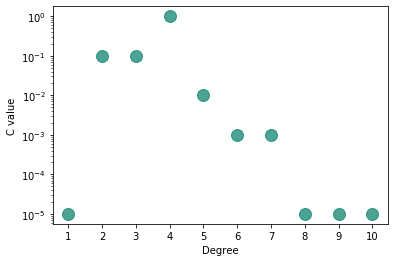

In [135]:
x = list(degree_best_c.keys())
y = list(degree_best_c.values())
plt.plot(x,y, 'o',color = '#007D66',alpha=0.7,markersize=12)
plt.yscale("log")
plt.xticks(degree_range)
plt.xlabel("Degree")
plt.ylabel("C value")
plt.show()

### Based on the plot, comment on the relationship between the Degree and C value of the model

**Your answer here**